In [1]:
# Extension to reload modules before cell execution
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

# sigmoid

We'll test the sigmoid function, and compare it to scipy's implementation to make sure we're getting the right return values.

In [ ]:
from nnScript import sigmoid # our sigmoid
from scipy.special import expit # scipy's sigmoid

In [ ]:
# these should be the same
print(sigmoid(1))
print(expit(1))

In [ ]:
for i in np.linspace(-10,10,100):
    assert(sigmoid(i) == expit(i)) # this shouldn't fail

In [ ]:
# for sanity check
try:
    assert(sigmoid(0.7) == expit(0.71)) # this should fail
except AssertionError as e:
    print("It Successfully Failed :D")

In [ ]:
# checking vector values
v = np.array([0.75, 0.3, -0.56, 0.01]) # random vector
print(sigmoid(v))
print(expit(v))
print("Are they equal?", sigmoid(v) == expit(v))

# preprocess

Now we'll test the preprocess function

In [ ]:
def preprocess():
    """ Input:
     Although this function doesn't have any input, you are required to load
     the MNIST data set from file 'mnist_all.mat'.

     Output:
     train_data: matrix of training set. Each row of train_data contains 
       feature vector of a image
     train_label: vector of label corresponding to each image in the training
       set
     validation_data: matrix of training set. Each row of validation_data 
       contains feature vector of a image
     validation_label: vector of label corresponding to each image in the 
       training set
     test_data: matrix of training set. Each row of test_data contains 
       feature vector of a image
     test_label: vector of label corresponding to each image in the testing
       set

     Some suggestions for preprocessing step:
     - feature selection"""

    mat = loadmat('mnist_all.mat')  # loads the MAT object as a Dictionary

    # Pick a reasonable size for validation data

    # ------------Initialize preprocess arrays----------------------#
    train_preprocess = np.zeros(shape=(50000, 784))
    validation_preprocess = np.zeros(shape=(10000, 784))
    test_preprocess = np.zeros(shape=(10000, 784))
    train_label_preprocess = np.zeros(shape=(50000,))
    validation_label_preprocess = np.zeros(shape=(10000,))
    test_label_preprocess = np.zeros(shape=(10000,))
    # ------------Initialize flag variables----------------------#
    train_len = 0
    validation_len = 0
    test_len = 0
    train_label_len = 0
    validation_label_len = 0
    # ------------Start to split the data set into 6 arrays-----------#
    for key in mat:
        # -----------when the set is training set--------------------#
        if "train" in key:
            label = key[-1]  # record the corresponding label
            tup = mat.get(key)
            sap = range(tup.shape[0])
            tup_perm = np.random.permutation(sap)
            tup_len = len(tup)  # get the length of current training set
            tag_len = tup_len - 1000  # defines the number of examples which will be added into the training set

            # ---------------------adding data to training set-------------------------#
            train_preprocess[train_len:train_len + tag_len] = tup[tup_perm[1000:], :]
            train_len += tag_len

            train_label_preprocess[train_label_len:train_label_len + tag_len] = label
            train_label_len += tag_len

            # ---------------------adding data to validation set-------------------------#
            validation_preprocess[validation_len:validation_len + 1000] = tup[tup_perm[0:1000], :]
            validation_len += 1000

            validation_label_preprocess[validation_label_len:validation_label_len + 1000] = label
            validation_label_len += 1000

            # ---------------------adding data to test set-------------------------#
        elif "test" in key:
            label = key[-1]
            tup = mat.get(key)
            sap = range(tup.shape[0])
            tup_perm = np.random.permutation(sap)
            tup_len = len(tup)
            test_label_preprocess[test_len:test_len + tup_len] = label
            test_preprocess[test_len:test_len + tup_len] = tup[tup_perm]
            test_len += tup_len
            # ---------------------Shuffle,double and normalize-------------------------#
    train_size = range(train_preprocess.shape[0])
    train_perm = np.random.permutation(train_size)
    train_data = train_preprocess[train_perm]
    train_data = np.double(train_data)
    train_data = train_data / 255.0
    train_label = train_label_preprocess[train_perm]

    validation_size = range(validation_preprocess.shape[0])
    vali_perm = np.random.permutation(validation_size)
    validation_data = validation_preprocess[vali_perm]
    validation_data = np.double(validation_data)
    validation_data = validation_data / 255.0
    validation_label = validation_label_preprocess[vali_perm]

    test_size = range(test_preprocess.shape[0])
    test_perm = np.random.permutation(test_size)
    test_data = test_preprocess[test_perm]
    test_data = np.double(test_data)
    test_data = test_data / 255.0
    test_label = test_label_preprocess[test_perm]

    # Feature selection
    # Your code here.

    print('preprocess done')

    return train_data, train_label, validation_data, validation_label, test_data, test_label

In [ ]:
train_data, train_label, validation_data, validation_label, test_data, test_label = preprocess()

We've now loaded what would normally be the returned data of preprocess() to the above variables.  Now we want to figure out a way to check if a value is the same accross all rows for a given column.

Since the algorthm will only be trained on 'train_data', we should only have to test this on that set of data.

In [ ]:
#https://stackoverflow.com/questions/14859458/how-to-check-if-all-values-in-the-columns-of-a-numpy-matrix-are-the-same
(train_data == train_data[0,:])

In [ ]:
res = np.all(train_data == train_data[0,:], axis = 0)
print(len(res)) # 784 == 28 x 28
print(res)

The above is a vector of size 784 indicating `True` if the column is the same for all rows and `False` otherwise.  So, any column that is `True` here is giving us the same value accross the every training example.

To make sure we're doing this correctly, we'll perform a similar check in a more intuitive, but disgusting inefficient way.  We see in the above example that the first entry is `True`, meaning that every row should share the same value (either `1` or `0`).

So, we'll loop through every example and check if an entry is the same in every row.

In [ ]:
# sanity check

# 0th Entry is True
t0 = train_data[0][0]
for t in train_data:
    if (t0 != t[0]):
        print("Something's wrong") # shouldn't print
        
# 100th Entry is True
t0 = train_data[0][100]
for t in train_data:
    if (t0 != t[100]):
        print("This one's right") # should print
        break

In [ ]:
# To see the sum of these values
for i in range(784):
    s = 0
    for t in train_data:
        s += t[i]

    print(i, res[i], s)

So, the above function works to find these useless features.  We now only need to remove those features from the data sets and note the indices.

In [ ]:
res = np.all(train_data == train_data[0,:], axis = 0)
removable_indices = np.where(res)
print(removable_indices) # indices of useless features

In [ ]:
clean_train_data = np.delete(train_data, removable_indices, 1)
print(train_data.shape)
print(clean_train_data.shape)

Notice how we removed columns from the matrix.

In [ ]:
print(train_data.shape)
print(clean_train_data.shape)

In [ ]:
res_train_data = np.all(train_data == train_data[0,:], axis = 0)
print(res_train_data)

res_clean_data = np.all(clean_train_data == clean_train_data[0,:], axis = 0)
print(res_clean_data)

In [ ]:
print(sum(res_train_data))
print(sum(res_clean_data)) #should be 0

Now we implement this into the code.

In [ ]:
from nnScript import preprocess

In [ ]:
train_data, train_label, validation_data, validation_label, test_data, test_label = preprocess()

In [ ]:
train_data.shape

In [ ]:
res = np.all(train_data == train_data[0,:], axis = 0)
print(sum(res))
print(res)

And it seems to work.

# nnObjFunction

In [3]:
from nnScript import preprocess, sigmoid, initializeWeights
from scipy.optimize import minimize

In [4]:
train_data, train_label, validation_data, validation_label, test_data, test_label = preprocess()

#  Train Neural Network

# set the number of nodes in input unit (not including bias unit)
n_input = train_data.shape[1]

# set the number of nodes in hidden unit (not including bias unit)
n_hidden = 50

# set the number of nodes in output unit
n_class = 10

# initialize the weights into some random matrices
initial_w1 = initializeWeights(n_input, n_hidden)
initial_w2 = initializeWeights(n_hidden, n_class)

# unroll 2 weight matrices into single column vector
initialWeights = np.concatenate((initial_w1.flatten(), initial_w2.flatten()), 0)

# set the regularization hyper-parameter
lambdaval = 0

args = (n_input, n_hidden, n_class, train_data, train_label, lambdaval)

# Train Neural Network using fmin_cg or minimize from scipy,optimize module. Check documentation for a working example

opts = {'maxiter': 50}  # Preferred value.

#nn_params = minimize(nnObjFunction, initialWeights, jac=True, args=args, method='CG', options=opts)

Used Features (array([ 12,  13,  14,  15,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
       199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,
       212, 213, 214, 215, 216, 217, 218, 219, 22

Implement the function

In [5]:
import matplotlib.pyplot as plt

In [25]:
def nnObjFunction(params, *args):
    n_input, n_hidden, n_class, training_data, training_label, lambdaval = args
    
#     training_data = training_data[:7000]
#     training_label = training_label[:7000]

    w1 = params[0:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
    w2 = params[(n_hidden * (n_input + 1)):].reshape((n_class, (n_hidden + 1)))
    obj_val = 0

    # Your code here
    
    # Set Bias
    
    b1 = np.ones((len(training_data), 1))
    b2 = np.ones((len(training_data), 1))

    # Forward Propagation
    X = np.append(training_data, b1, 1) # append bias
    net1 = X.dot(w1.T)
    o1 = sigmoid(net1)
    
    H = np.append(o1, b2, 1)
    net2 = H.dot(w2.T)
    o2 = sigmoid(net2)
    
    # 1-hot encoding
    y = np.zeros(o2.shape)
    y[np.arange(o2.shape[0]), training_label.astype(int)] = 1
    
    # Error
    E = (y*np.log(o2) + (np.ones(y.shape) - y)*np.log(np.ones(o2.shape) - o2))
    obj_val = -(np.sum(E) / len(training_data))
    
    plt_data.append(obj_val)
    
    # Gradients
    grad_w2 = np.dot((o2-y).T, H)
    sm = (o2 - y).dot(w2[:,:-1]).T # note: we remove the bias from w2
    tm = ((1-o1)*o1).T
    grad_w1 = (sm * tm).dot(X)
    
    # Make sure you reshape the gradient matrices to a 1D array. for instance if your gradient matrices are grad_w1 and grad_w2
    # you would use code similar to the one below to create a flat array
    obj_grad = np.concatenate((grad_w1.flatten(), grad_w2.flatten()),0)
    #obj_grad = np.array([])

    return (obj_val, obj_grad)

Test it

In [44]:
plt_data = []
opts = {'maxiter': 1}
iter_weights = initialWeights
for i in range(500):
    print("Iter: {}".format(i))
    random_sample_index = np.random.choice(np.arange(len(train_data)), 1000)
    args = (n_input, n_hidden, n_class, train_data[random_sample_index], train_label[random_sample_index], lambdaval)
    nn_params = minimize(nnObjFunction, iter_weights, jac=True, args=args, method='CG', options=opts)
    iter_weights = nn_params.x

Iter: 0
Iter: 1
Iter: 2
Iter: 3
Iter: 4
Iter: 5
Iter: 6
Iter: 7
Iter: 8
Iter: 9
Iter: 10
Iter: 11
Iter: 12
Iter: 13
Iter: 14
Iter: 15
Iter: 16
Iter: 17
Iter: 18
Iter: 19
Iter: 20
Iter: 21
Iter: 22
Iter: 23
Iter: 24
Iter: 25
Iter: 26
Iter: 27
Iter: 28
Iter: 29
Iter: 30
Iter: 31
Iter: 32
Iter: 33
Iter: 34
Iter: 35
Iter: 36
Iter: 37
Iter: 38
Iter: 39
Iter: 40
Iter: 41
Iter: 42
Iter: 43
Iter: 44
Iter: 45
Iter: 46
Iter: 47
Iter: 48
Iter: 49
Iter: 50
Iter: 51
Iter: 52
Iter: 53
Iter: 54
Iter: 55
Iter: 56
Iter: 57
Iter: 58
Iter: 59
Iter: 60
Iter: 61
Iter: 62
Iter: 63
Iter: 64
Iter: 65
Iter: 66
Iter: 67
Iter: 68
Iter: 69
Iter: 70
Iter: 71
Iter: 72
Iter: 73
Iter: 74
Iter: 75
Iter: 76
Iter: 77
Iter: 78
Iter: 79
Iter: 80
Iter: 81
Iter: 82
Iter: 83
Iter: 84
Iter: 85
Iter: 86
Iter: 87
Iter: 88
Iter: 89
Iter: 90
Iter: 91
Iter: 92
Iter: 93
Iter: 94
Iter: 95
Iter: 96
Iter: 97
Iter: 98
Iter: 99
Iter: 100
Iter: 101
Iter: 102
Iter: 103
Iter: 104
Iter: 105
Iter: 106
Iter: 107
Iter: 108
Iter: 109
Iter: 110


In [45]:
nn_params

     fun: 0.3591468439109258
     jac: array([ 0.        ,  0.        ,  0.        , ...,  0.4143018 ,
       -0.0896678 , -4.01734185])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 3
     nit: 1
    njev: 3
  status: 1
 success: False
       x: array([-0.08312873, -0.07580961,  0.06730777, ..., -1.13913475,
       -2.33783022, -0.56240824])

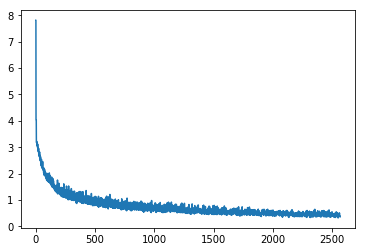

In [46]:
plt.plot(plt_data)
plt.show()

The above plot ought to show a pretty successful learning process.

# nnPredict

Now we have to "reverse" the process and use our newly optimized weights to predict a label given a feature matrix.

In [47]:
def nnPredict(w1, w2, data):
    """% nnPredict predicts the label of data given the parameter w1, w2 of Neural
    % Network.

    % Input:
    % w1: matrix of weights of connections from input layer to hidden layers.
    %     w1(i, j) represents the weight of connection from unit i in input 
    %     layer to unit j in hidden layer.
    % w2: matrix of weights of connections from hidden layer to output layers.
    %     w2(i, j) represents the weight of connection from unit i in input 
    %     layer to unit j in hidden layer.
    % data: matrix of data. Each row of this matrix represents the feature 
    %       vector of a particular image
       
    % Output: 
    % label: a column vector of predicted labels"""

    labels = np.array([])
    bias = np.ones((len(data), 1))

    # Forward Propagation
    X = np.append(data, bias, 1) # append bias
    net1 = X.dot(w1.T)
    o1 = sigmoid(net1)
    
    H = np.append(o1, bias, 1)
    net2 = H.dot(w2.T)
    o2 = sigmoid(net2)
    
    labels = np.array(np.argmax(o2, axis=1))

    return labels

In [48]:
w1 = nn_params.x[0:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
w2 = nn_params.x[(n_hidden * (n_input + 1)):].reshape((n_class, (n_hidden + 1)))

# Test the computed parameters

predicted_label = nnPredict(w1, w2, train_data)

In [49]:
print(predicted_label)

[6 2 4 ... 7 0 8]


In [50]:
print(train_label)

[6. 2. 4. ... 7. 0. 1.]


In [51]:
print("Accuracy:", sum(predicted_label == train_label)/len(train_label)*100, "%")

Accuracy: 93.916 %
